# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [107]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
# To tune different models
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
# To get diferent metric scores
# from sklearn.metrics import (
#     f1_score,
#     accuracy_score,
#     recall_score,
#     precision_score,
#     confusion_matrix,
#     roc_auc_score,
#     classification_report,
#     precision_recall_curve,
#     roc_curve,
#     make_scorer,
# )

## Data Overview

- Observations
- Sanity checks

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
df = pd.read_csv('/content/drive/MyDrive/ExtraaLearn.csv')

In [5]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [7]:
df.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [16]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

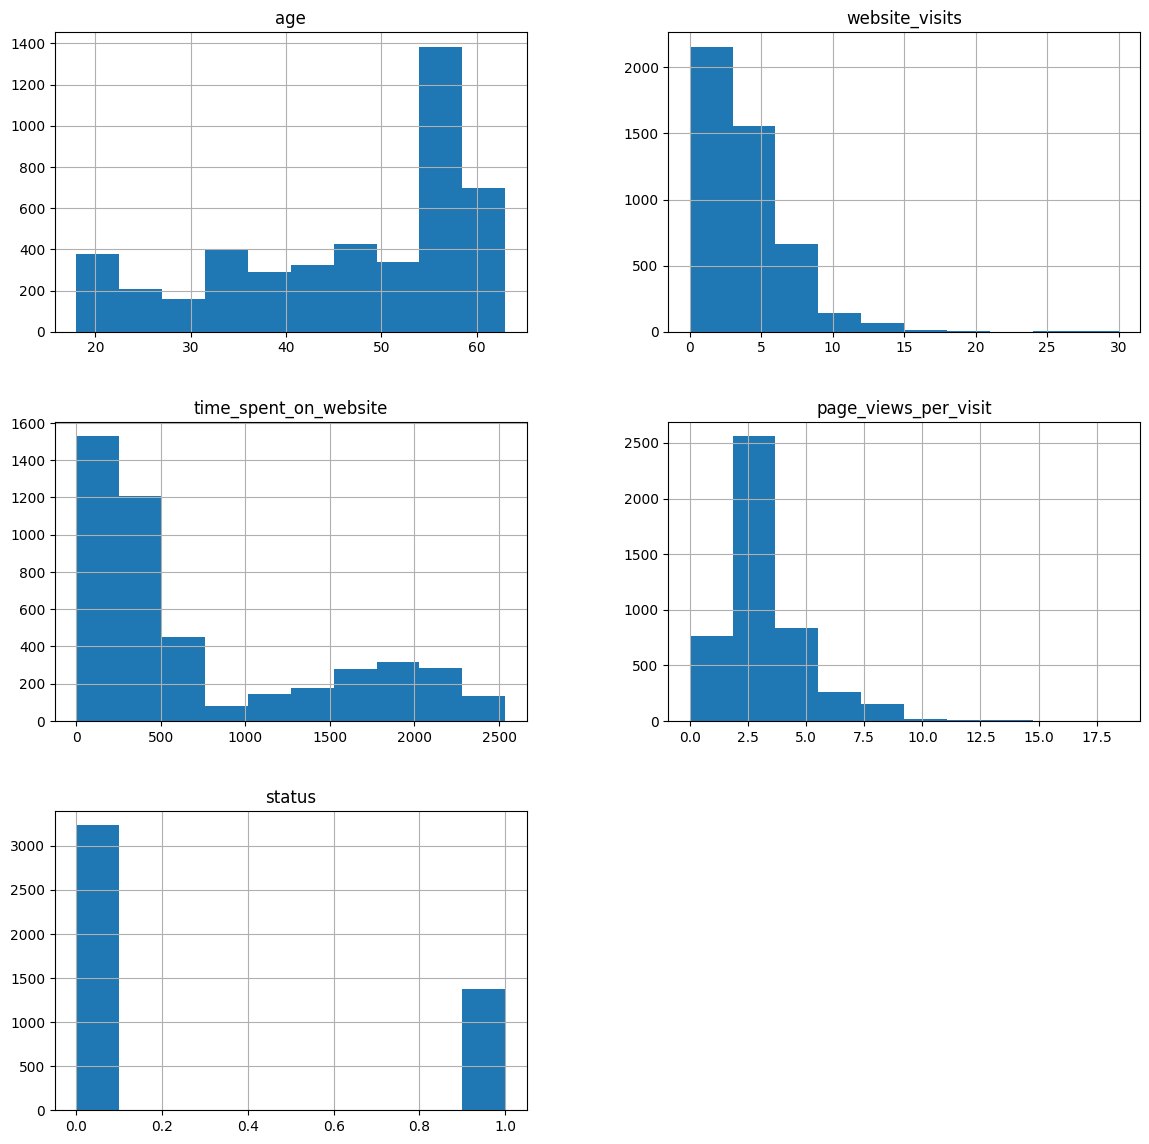

In [17]:
df[num_cols].hist(figsize = (14, 14))

plt.show()

In [18]:
cat_cols = list(df.select_dtypes("object").columns)

In [19]:
df[cat_cols].describe().T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


In [20]:
for i in cat_cols:

    print(df[i].value_counts(normalize = True))

    print('*' * 40)

ID
EXT001    0.00022
EXT2884   0.00022
EXT3080   0.00022
EXT3079   0.00022
EXT3078   0.00022
            ...  
EXT1537   0.00022
EXT1536   0.00022
EXT1535   0.00022
EXT1534   0.00022
EXT4612   0.00022
Name: proportion, Length: 4612, dtype: float64
****************************************
current_occupation
Professional   0.56722
Unemployed     0.31245
Student        0.12034
Name: proportion, dtype: float64
****************************************
first_interaction
Website      0.55117
Mobile App   0.44883
Name: proportion, dtype: float64
****************************************
profile_completed
High     0.49089
Medium   0.48591
Low      0.02320
Name: proportion, dtype: float64
****************************************
last_activity
Email Activity     0.49393
Phone Activity     0.26756
Website Activity   0.23851
Name: proportion, dtype: float64
****************************************
print_media_type1
No    0.89224
Yes   0.10776
Name: proportion, dtype: float64
************************

In [21]:
df = df.drop(['ID'] , axis = 1)

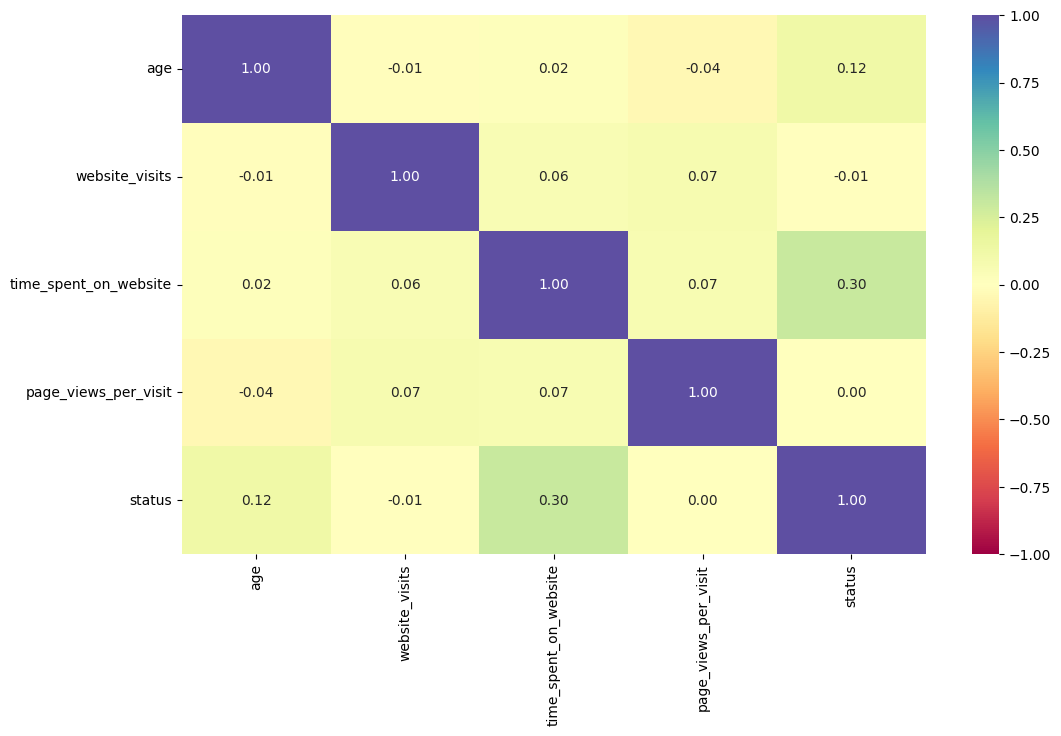

In [22]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [23]:
df["status"].unique()

array([1, 0])

In [27]:
# Creating a list of columns for which we will create dummy variables
cat_cols = list(df.select_dtypes("object").columns)
to_get_dummies_for = cat_cols

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,1,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.32000,0,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.07400,0,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.05700,1,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.91400,0,True,False,True,False,False,False,False,False,False,False,False,False


In [28]:
Y = df["status"]
X = df.drop(["status"], axis=1)


In [29]:
X.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.86100,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.32000,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.07400,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.05700,False,True,True,False,False,False,True,False,False,False,False,False
4,23,4,600,16.91400,True,False,True,False,False,False,False,False,False,False,False,False


In [30]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: status, dtype: int64

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

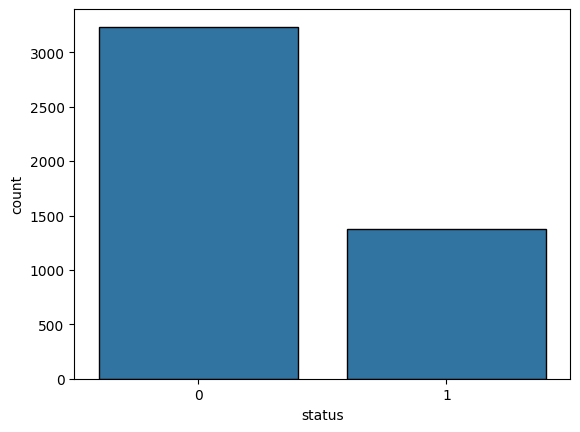

In [43]:
sns.countplot(data=df, x='status', edgecolor = "black");

In [44]:

pct_label_0 = Y[Y == 0].shape[0] / Y.shape[0]

pct_label_1 = Y[Y == 1].shape[0] / Y.shape[0]

print(f'Percentage of Label 0 (Not Convert): {round(pct_label_0*100, 2)}.   Percentage of Label 1 (Convert): {round(pct_label_1*100, 2)}')


Percentage of Label 0 (Not Convert): 70.14.   Percentage of Label 1 (Convert): 29.86


## Building a Decision Tree model

In [45]:
## The model can make two types of wrong predictions:

# Predicting a lead will convert when the lead doesn't convert
# Predicting a lead will not convert when the lead actually converts --> False Positive
# The issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly --> False negative

#Since the goal is allocate resources appropriately, we need to reduce False Positives

#How to reduce False Positives?

# The company would want the Precision to be maximized, the greater the Precision,
# the higher the chances of minimizing false positives. Hence,
# the focus should be on increasing the Precision (minimizing the false positives) or,
# in other words, identifying the true negatives

In [47]:
def metrics_score(actual, predicted):

    # Print classification report
    print(classification_report(actual, predicted))

    # Compute confusion matrix
    cm = confusion_matrix(actual, predicted)

    # Plot confusion matrix
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Convert', 'Convert'], yticklabels = ['Not Convert', 'Convert'])
    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [57]:
def model_performance_classification(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier

    predictors: independent variables

    target: dependent variable
    """

    # Predicting using the independent variables
    pred = model.predict(predictors)

    recall = recall_score(target, pred, average = 'macro')          # To compute recall
    precision = precision_score(target, pred, average = 'macro')    # To compute precision
    acc = accuracy_score(target, pred)                              # To compute accuracy score

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame({"Precision": precision,
                            "Recall":  recall,
                            "Accuracy": acc}, index = [0])

    return df_perf

In [81]:
# Building decision tree model
dt_no_weights = DecisionTreeClassifier(random_state = 1)

dt_weights = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

In [82]:
# Fitting decision tree model
dt_no_weights.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [83]:
dt_weights.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

## Model Performance evaluation and improvement

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



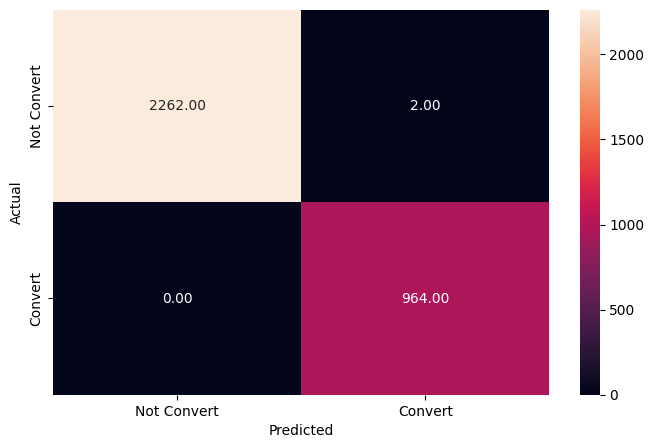

In [84]:
# Checking performance on the training dataset
y_train_pred_dt = dt_weights.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       971
           1       0.66      0.62      0.64       413

    accuracy                           0.79      1384
   macro avg       0.75      0.74      0.75      1384
weighted avg       0.79      0.79      0.79      1384



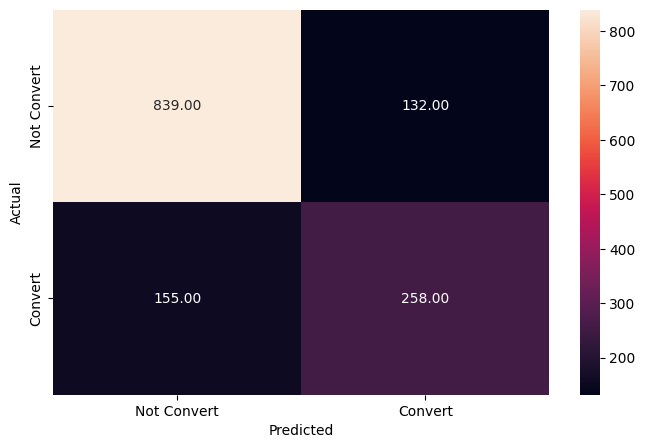

In [85]:
#The Decision tree is giving CLOSE to a 100% score for all metrics on the training dataset.

# Checking performance on the test dataset
y_test_pred_dt = dt_weights.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [86]:
model_performance_classification(dt_weights, x_train, y_train)

,Precision,Recall,Accuracy
0,0.99896,0.99956,0.99938


In [87]:
model_performance_classification(dt_weights, x_test, y_test)

,Precision,Recall,Accuracy
0,0.75280,0.74438,0.79263


In [88]:
#The Decision Tree works well on the training data but not so well on the test data
#as the precision is 0.75 in comparison to .99 for the training dataset, i.e., the Decision Tree is overfitting the training data.

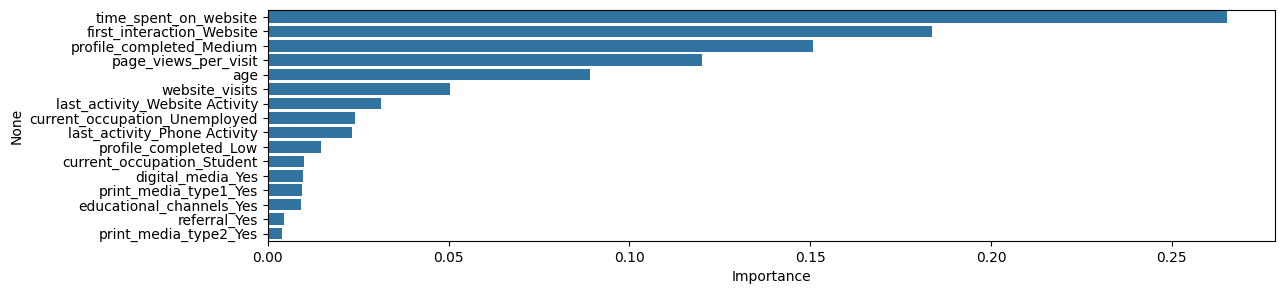

In [89]:
# Feature importance
importances = dt_weights.feature_importances_

# Rename columns
columns = X.columns

# Create a DataFrame with features importance
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Plot
plt.figure(figsize = (13, 3))
sns.barplot(x=importance_df.Importance,y=importance_df.index);

In [64]:
#According to the Decision Tree, Time spent on website is the most important feature, followed by First interaction - wesite, medium profile completion, and Page views per visit.
#This might signify that people with high chance of converting have spent more time on the website, had their first interaction via website and look at a lot of pages on the website viewed during the visits

In [117]:
#Start Tuning using GridSearch

%%time
# Choose the type of classifier
dtree_tuned = DecisionTreeClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]}

# Type of scoring used to compare parameter combinations.
# "pos_label": It allows you to specify which class label should be considered as the positive class when calculating the scoring metric.
# By default, pos_label = 1, but you can change it based on your specific use case.
scorer = metrics.make_scorer(precision_score, pos_label = 0)

# Grid search object
gridCV = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 10)

# Fitting the grid search on the train data
gridCV = gridCV.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
dtree_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_tuned.fit(x_train, y_train)

CPU times: user 7.95 s, sys: 27.4 ms, total: 7.98 s
Wall time: 10.4 s


DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=3,
                       min_samples_leaf=5, random_state=1)

In [118]:
gridCV.best_estimator_.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 3,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 1,
 'min_impurity_decrease': 0.0,
 'class_weight': {0: 0.3, 1: 0.7},
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['age', 'website_visits', 'time_spent_on_website',
        'page_views_per_visit', 'current_occupation_Student',
        'current_occupation_Unemployed', 'first_interaction_Website',
        'profile_completed_Low', 'profile_completed_Medium',
        'last_activity_Phone Activity', 'last_activity_Website Activity',
        'print_media_type1_Yes', 'print_media_type2_Yes',
        'digital_media_Yes', 'educational_channels_Yes', 'referral_Yes'],
       dtype=object),
 'n_features_in_': 16,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 16,
 'tree_': <sklearn.tree._tree.Tree at 0x7e676cc3dd80>}

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2264
           1       0.60      0.91      0.72       964

    accuracy                           0.79      3228
   macro avg       0.78      0.83      0.78      3228
weighted avg       0.85      0.79      0.80      3228



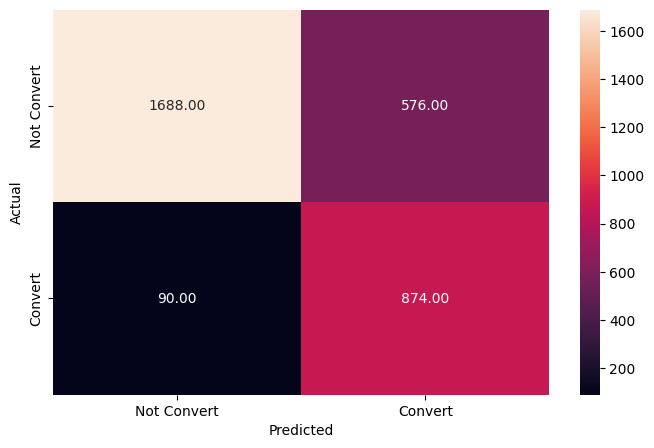

In [119]:
y_train_pred_dt = dtree_tuned.predict(x_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       971
           1       0.58      0.89      0.70       413

    accuracy                           0.78      1384
   macro avg       0.76      0.81      0.76      1384
weighted avg       0.83      0.78      0.79      1384



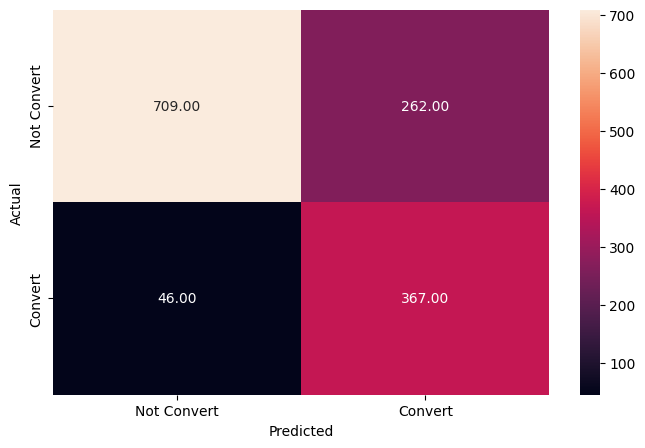

In [120]:
# Checking performance on the TEST SET
y_test_pred_dt = dtree_tuned.predict(x_test)

metrics_score(y_test, y_test_pred_dt)

In [121]:
# TEST DATA
dtree_tuned_test = model_performance_classification(dtree_tuned,x_test,y_test)
dtree_tuned_test

,Precision,Recall,Accuracy
0,0.76127,0.80940,0.77746


In [122]:
#Before Tuning

temp = pd.concat([model_performance_classification(dt_weights, x_train, y_train),
                  model_performance_classification(dt_weights, x_test, y_test)], axis=0)

temp.index = ['Training dataset', 'Test dataset']

temp

,Precision,Recall,Accuracy
Training dataset,0.99896,0.99956,0.99938
Test dataset,0.75280,0.74438,0.79263


In [123]:
#After Tuning

temp = pd.concat([model_performance_classification(dtree_tuned, x_train, y_train),
                  model_performance_classification(dtree_tuned, x_test, y_test)], axis=0)

temp.index = ['Training dataset', 'Test dataset']

temp

,Precision,Recall,Accuracy
Training dataset,0.77607,0.82611,0.79368
Test dataset,0.76127,0.80940,0.77746


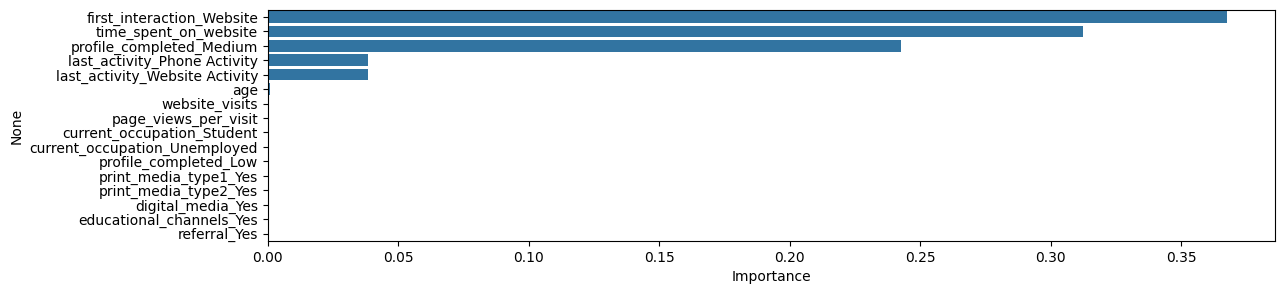

In [124]:
#Looks like there wasn't much of an improvement with the cross validation tuning. Starting to look at pruning some features


# Feature importance
importances = dtree_tuned.feature_importances_

# Rename columns
columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

# Plot
plt.figure(figsize = (13, 3))
sns.barplot(x= importance_df.Importance, y= importance_df.index);

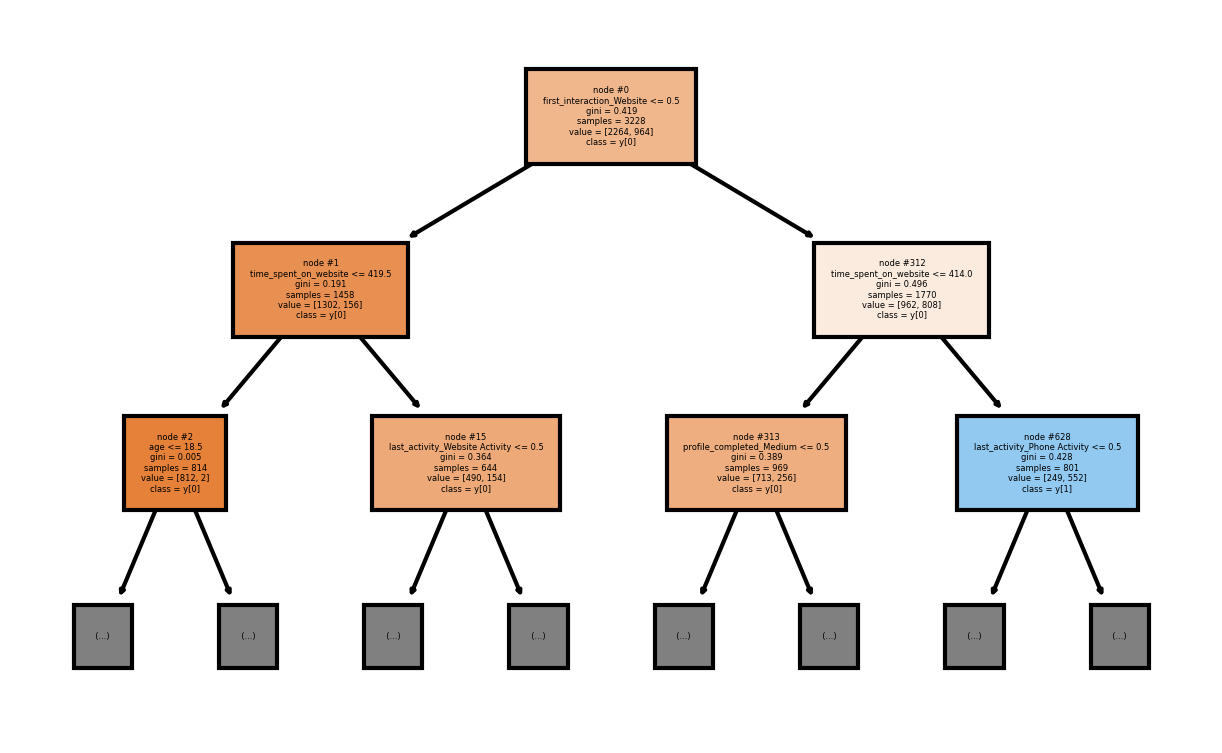

In [105]:
features = list(X.columns)

plt.figure(figsize = (5, 3), dpi=300)

# "node_ids": Show the ID number on each node.
# "class_names": Names of each of the target classes in ascending numerical order
tree.plot_tree(dt_no_weights, max_depth = 2, feature_names = features, filled = True, fontsize = 2, node_ids = True, class_names = True)

plt.show()

## Building a Random Forest model

In [108]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

rf_estimator.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



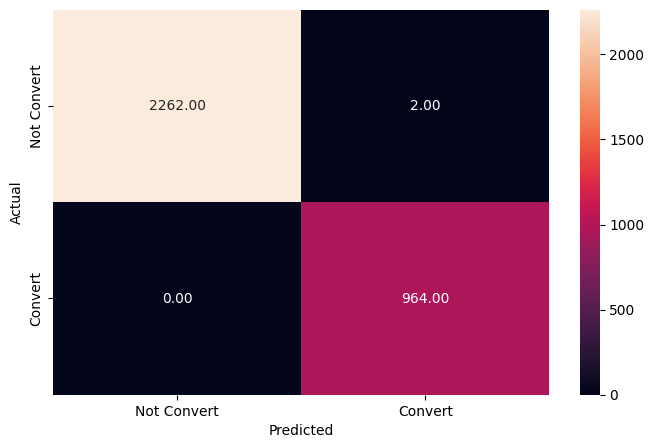

In [109]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       971
           1       0.81      0.72      0.76       413

    accuracy                           0.87      1384
   macro avg       0.85      0.82      0.83      1384
weighted avg       0.86      0.87      0.86      1384



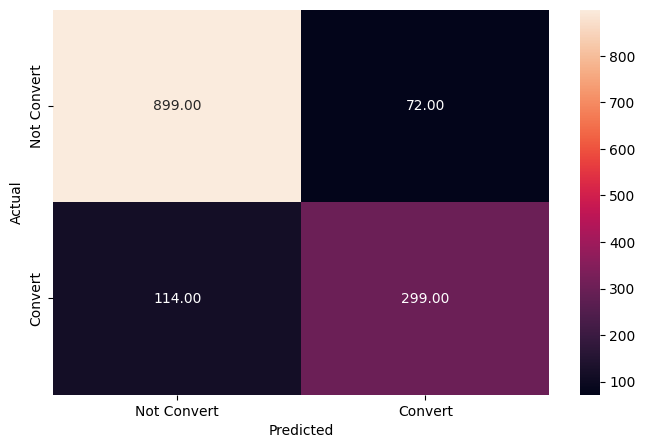

In [110]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)

metrics_score(y_test, y_pred_test_rf)

## Model Performance evaluation and improvement

In [111]:
# Checking performance on the TRAINING SET
model_performance_classification(rf_estimator, x_train, y_train)

,Precision,Recall,Accuracy
0,0.99896,0.99956,0.99938


In [112]:
# Checking performance on the TEST SET
rf_estimator_test = model_performance_classification(rf_estimator,x_test,y_test)
rf_estimator_test

,Precision,Recall,Accuracy
0,0.84670,0.82491,0.86561


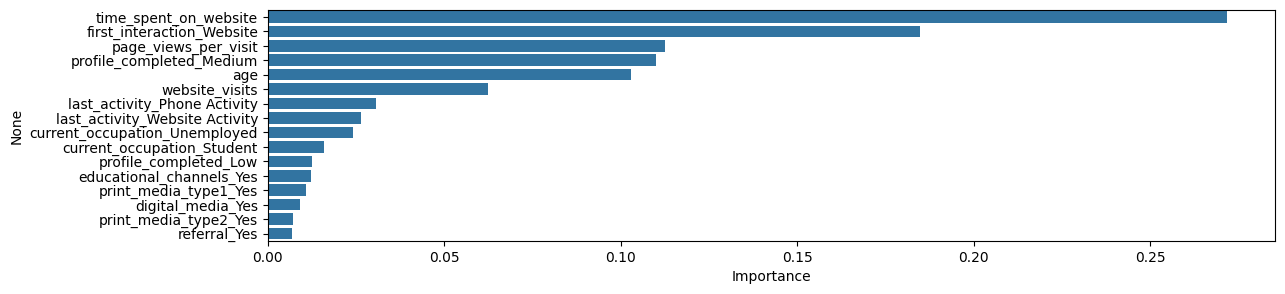

In [114]:
#Check importance of features

importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 3))

sns.barplot(x= importance_df.Importance, y=importance_df.index);

In [125]:
#Tuning the model

%%time
# Choose the type of classifier
rf_estimator_tuned = RandomForestClassifier(class_weight = {0: 0.30, 1: 0.70}, random_state = 1)

# Grid of parameters to choose from
params_rf = {"n_estimators": [100, 250, 500],
             "min_samples_leaf": np.arange(1, 4, 1),
             "max_features": [0.7, 0.9, 'auto']}

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(precision_score, pos_label = 0)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(x_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

CPU times: user 4min 20s, sys: 763 ms, total: 4min 21s
Wall time: 4min 36s


In [126]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_features='auto',
                       min_samples_leaf=3, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2264
           1       0.84      0.94      0.89       964

    accuracy                           0.93      3228
   macro avg       0.91      0.93      0.92      3228
weighted avg       0.94      0.93      0.93      3228



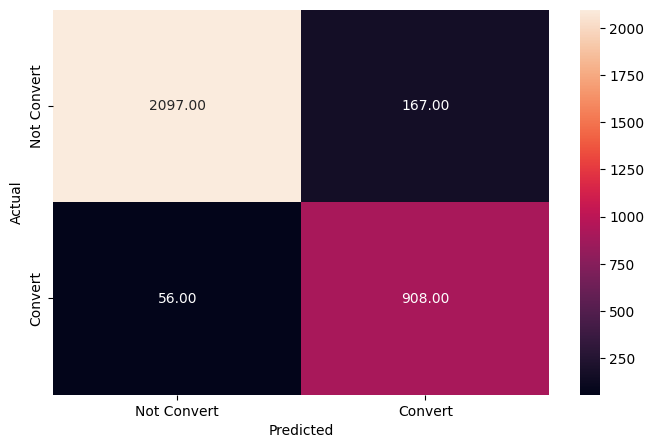

In [127]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)

metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       971
           1       0.74      0.79      0.76       413

    accuracy                           0.85      1384
   macro avg       0.82      0.84      0.83      1384
weighted avg       0.86      0.85      0.86      1384



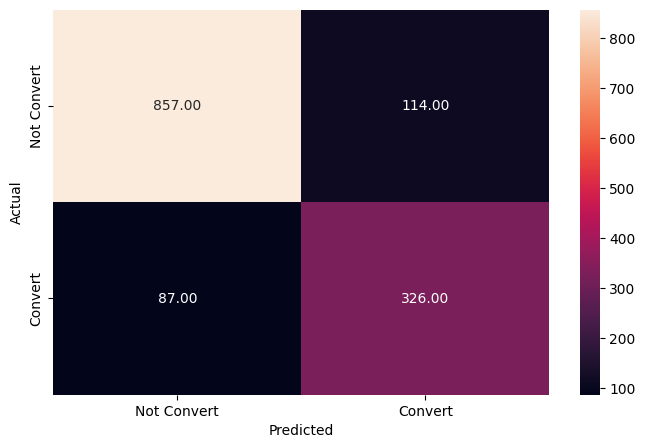

In [128]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)

metrics_score(y_test, y_pred_test_rf_tuned)

In [129]:
# Checking performance on the TRAINING SET
model_performance_classification(rf_estimator_tuned, x_train, y_train)

,Precision,Recall,Accuracy
0,0.90932,0.93407,0.93092


In [130]:
# Checking performance on the TEST SET
rf_estimator_tuned_test = model_performance_classification(rf_estimator_tuned, x_test, y_test)
rf_estimator_tuned_test

,Precision,Recall,Accuracy
0,0.82437,0.83597,0.85477


<Axes: xlabel='Importance', ylabel='None'>

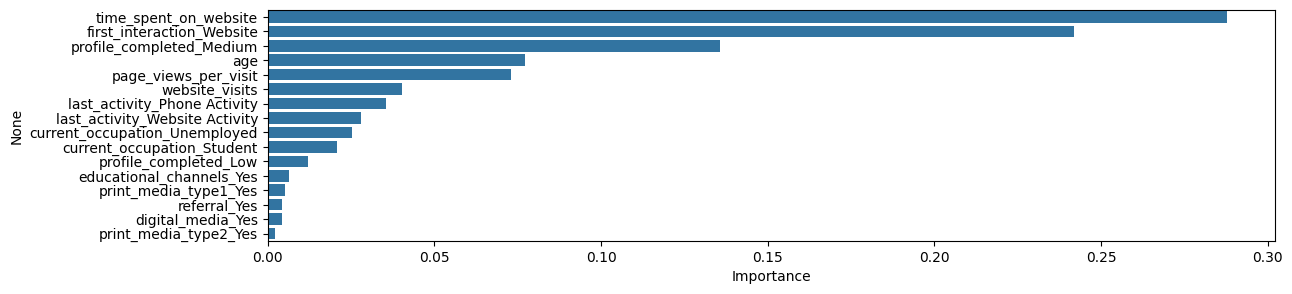

In [132]:
# Plotting feature importance
importances = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 3))

sns.barplot(x= importance_df.Importance, y= importance_df.index)

## Actionable Insights and Recommendations

In [ ]:
#The best model so far is the tuned random forest model which is giving nearly ~ 82% precision for class 0 on the test data.

#The company should use this model to know beforehand which lead is not going to convert and act accordingly.